## Import modules

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

import pickle

import sys
sys.path.append("../")

## Import data

In [11]:
grating_type = "Ilic"
k_lambda = 100
k_width = 100
pkl_fname = rf'Data/{grating_type}_Stability_Diagram_klambda{k_lambda}_by_kwidth{k_width}_num_neg_zero.pkl'

with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

In [12]:
R = data['real_stability']
Imag = data['imag_stability']
w_array = data['width_array']
v_array = data['v_array']
final_speed = data['final speed']

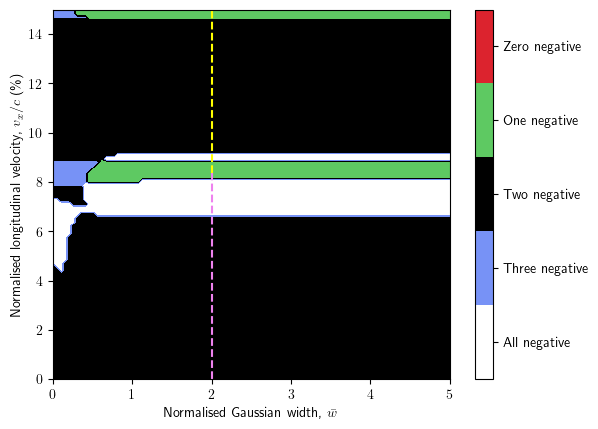

In [13]:
plt.rcParams['text.usetex'] = True

######## Truncating to 17.5%
colours = np.array(["#ffffff","#7792f6","black","#5ec962","#dc232e"])
                   #   0.1     0.2         0.3     0.4         0.5
                   # 4 neg     3 neg       2 neg   1 neg       0 neg
cmap = ListedColormap(colours)
vmin, vmax = 0, 0.6  
tickmarks = [0.1, 0.2, 0.3, 0.4, 0.5]
ticks = np.array(["All negative", "Three negative","Two negative", "One negative", "Zero negative"])

# Real
fig, ax = plt.subplots(1)
contour = ax.contourf(w_array, 100*v_array,R, cmap=cmap, levels=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
cbar = fig.colorbar(contour, ticks=tickmarks, boundaries=np.linspace(vmin, vmax, len(colours)+1), extend='neither')
cbar.set_ticklabels(ticks)

# ax.hlines(8.56,0,10,"w")

ax.set(xlabel=r"Normalised Gaussian width, $\bar{w}$", ylabel=r"Normalised longitudinal velocity, $v_x/c$ (\%)")
ax.set_ylim([0,final_speed])
ax.set_xlim([0,5])
ax.vlines(2,0,8.38,color="violet",linestyles="dashed")
ax.vlines(2,8.38,final_speed,color="yellow",linestyles="dashed")

# fig.savefig("Data/Ilic_stability_diagram.pdf", bbox_inches='tight')


<>:21: SyntaxWarning: invalid escape sequence '\,'
<>:21: SyntaxWarning: invalid escape sequence '\,'
/var/folders/bz/95rhslyj4493n5lk5jdsf5pw0000gp/T/ipykernel_44566/4282309991.py:21: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel("$v_x\,/\,c$ (\%) - longitudinal velocity")


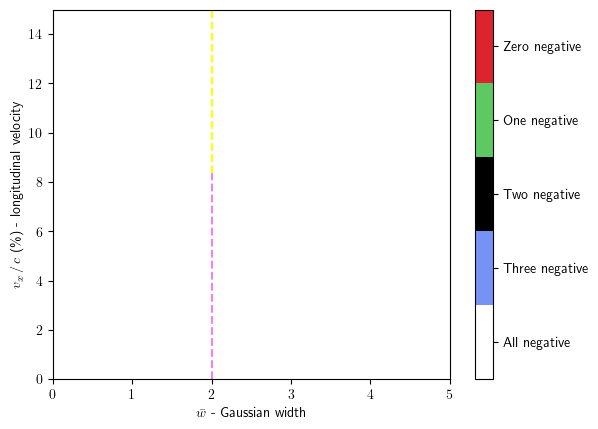

In [14]:
plt.rcParams['text.usetex'] = True

######## Truncating to 17.5%
colours=np.array(["#ffffff","#7792f6","black","#5ec962","#dc232e"])
                #   0.1     0.2         0.3     0.4         0.5
                # 4 neg     3 neg       2 neg   1 neg       0 neg
cmap = ListedColormap(colours)
vmin, vmax = 0, 0.6  # Set the desired limits
tickmarks=[0.1, 0.2, 0.3, 0.4, 0.5]
ticks=np.array(["All negative", "Three negative","Two negative", "One negative", "Zero negative"])

# Imag
fig=plt.figure()
contour = plt.contourf(w_array,100*v_array,Imag, cmap=cmap, levels=[0.05, 0.15, 0.25, 0.35, 0.45, 0.55])
cbar = plt.colorbar(contour, ticks=tickmarks, boundaries=np.linspace(vmin, vmax, len(colours) + 1), extend='neither')
cbar.set_ticklabels(ticks)

#plt.hlines(8.56,0,10,"w")

plt.xlabel("$\\bar{w}$ - Gaussian width")
plt.ylabel("$v_x\,/\,c$ (\%) - longitudinal velocity")
plt.ylim([0,final_speed])
plt.xlim([0,5])
plt.vlines(2,0,8.38,color="violet",linestyles="dashed")
plt.vlines(2,8.38,final_speed,color="yellow",linestyles="dashed")

# plt.savefig("Saved/StabilityDiagram1600.jpeg",format="jpeg",dpi=1600,bbox_inches='tight')
# plt.close(fig)

# plt.show()


In [15]:
from parameters import Parameters, D1_ND
_, L, m, c = Parameters()
if grating_type=="Ilic":
    ## Ilic
    wavelength      = 1.5 
    grating_pitch   = 1.8 / wavelength
    grating_depth   = 0.5 / wavelength
    box1_width      = 0.15 * grating_pitch
    box2_width      = 0.35 * grating_pitch
    box_centre_dist = 0.60 * grating_pitch
    box1_eps        = 3.5**2 
    box2_eps        = 3.5**2
    gaussian_width  = 2 * L
    substrate_depth = 0.5 / wavelength
    substrate_eps   = 1.45**2
if grating_type=="Optimised":
    ## Optimised - second
    grating_pitch   = 1.5384469388251338
    grating_depth   = 0.5580762361523982
    box1_width      = 0.10227122552871484
    box2_width      = 0.07605954942866577
    box_centre_dist = 0.2669020979549422
    box1_eps        = 9.614975107945112
    box2_eps        = 9.382304398409568
    gaussian_width  = 33.916288616522735
    substrate_depth = 0.17299998450776535
    substrate_eps   = 9.423032644325023

wavelength = 1.
angle = 0.
Nx = 100
numG = 25
Qabs = np.inf

from twobox import TwoBox
grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs)

In [16]:
grating.wavelength = 1/D1_ND(4.5/100)
grating.Eigs()

(array([-4.99527828e-03, -4.99527828e-03, -1.28482647e-05, -1.28482647e-05]),
 array([ 232.25668514, -232.25668514,   80.73342743,  -80.73342743]))